# Solutions to Applied Statistics Assessment

In [2]:
# Mathematical functions from the standard library
import math

# Permutations and combinations
import itertools

# Random selections
import random

# Numerical structures and applications
import numpy as np

# Plotting
import matplotlib.pyplot as plt

## Introduction

## Problem 1: Extending the Lady Tasting Tea Experiment

### __Brief__: 

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### __Solution:__

#### Background

The lady tasting tea is a famous statistical experiment devised by [Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) to investigate a woman's claim that she could distinguish whether milk was poured first into a cup of tea or if the tea was poured in first. 

In the original experiment eight cups of tea were presented to the lady - four with milk first and four with tea first. They were identical in all other respects and were presented in a _random_ order. Fisher aimed to calculate the probability, _p_ that the lady was selecting the four milk first cups purely by chance.

As part of this experiment, Fisher introduced the null hypothesis, _H<sub>0</sub>_ and the alternative hypothesis,  _H<sub>a</sub>_. The null hypothesis is the default position and is assumed to be true unless proven otherwise. The alternative hypothesis opposes the null hypothesis and assumes a relationship between the variables. As stated in this article, Alternative Hypothesis: Definition, Types and Examples on [geeksforgeeks.org](https://www.geeksforgeeks.org/maths/alternative-hypothesis-definition-types-and-examples/)  
>"The null and alternative hypotheses are exhaustive, meaning that together they cover every possible outcome. They are also mutually exclusive, meaning that only one can be true at a time".

For this experiment the null hypothesis and the alternative hypothesis are as follows:

>__Null Hypothesis _H<sub>0</sub>_:__
>
>* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
>* The lady is selecting the four cups from eight at random.
>
>__Alternative Hypothesis _H<sub>a</sub>_:__
>* The lady can tell the difference. 

Randomisation of the order of the cups and the order in which the cups were presented to the lady is a key component of the experiment. As discussed in [The historical and statistical significance of the lady tasting tea experiment](https://jyyna.co.uk/lady-tasting-tea/) randomisation eliminates selection bias ensuring that each cup has an equal chance of being selected and facilitates statistical analysis as statistical tests assume randomness. As an aside, the author replicated the experiment with his friends - none of them could match the lady's accuracy!

[Probability](https://statisticsbyjim.com/probability/probability-fundamentals/) is the measure of likelihood of an event occurring, expressed as a value between 0 and 1, where 0 is impossible and 1 is certain. A low _p_ indicates evidence against the null hypothesis. [Combinatorial maths](https://www.geeksforgeeks.org/engineering-mathematics/combinatorics/) is used to calculate the probability of the lady selecting at random the four milk in first cups from eight cups. The [class lecture notes](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) provides a more detailed explanation of how to perform this calculation with Python.

 $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ where ${n}$ is the total number of cups and ${k}$ is the number of cups with milk in first. 

Using this equation the probability, _p_ of correctly identifying at random all four milk first cups is 1/70. In other words, if she is choosing at random, she has a one in seventy chance or a probability of 0.014 of correctly selecting the four cups with milk in first. Fisher also chose a significance level, α of 0.05. As he states in page 13 of [The Design of Experiments](https://home.iitk.ac.in/~shalab/anova/DOE-RAF.pdf): 
>"It is open to the experimenter to be more or less exacting in respect of the smallness of the probability he would require before he would be willing to admit that his observations have demonstrated a positive result". 

Since the probability of selecting the four cups at random is smaller than the significance level we can say that the null hypothesis is rejected in favour of the alternative hypothesis.  
As the lady correctly selected all four milk first cups we can say that she can indeed detect if milk or tea has been poured first into the cup. 

https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786

### Simulate the Experiment Using NumPy

The problem requires the use of numpy to simulate the experiment. 

The key steps are:
1. Set the null hypothesis and alternative hypothesis, and significance level. 
   
   >__Null Hypothesis _H<sub>0</sub>_:__
    >* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
    >* The lady is selecting the four cups from twelve at random.
    >
    >__Alternative Hypothesis _H<sub>a</sub>_:__
    >* The lady can tell the difference. 
    >
    >__Significance level, α:__ 0.05

2. Decide on the number of times to repeat the experiment. 
   
   As the brief says 'many times', I chose to repeat the experiment 10,000,000 times. This will give a more accurate estimate. 
3. Set up a counter to track the number of successful outcomes. 
4. Set up a numpy array with 12 labels from 0 to 11 inclusive. These are the twelve cups. 
5. Shuffle the labels using [numpy.random.shuffle()](https://numpy.org/doc/2.1/reference/random/generated/numpy.random.shuffle.html).

   This function randomly rearranges elements within an array in-place. Each run may produce a different permutation. 
6. Choose four labels from the cups array to be milk in first. 

   To choose four cups from the array, the function [numpy.random.choice()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) was used. It has three parameters:

    a: the array to sample from
    size: the number of elements to select (4)
    replace: either True or False. 
    
    If the replace parameter is True it samples with replacement. For this experiment ``replace = False`` as we want sample without replacement. When a cup is selected we do not it replaced back into the array again. 

    The array is sorted in ascending order with np.sort(). This will make the comparison step between the two arrays simpler as the position of the element matters when comparing arrays.

7. Using numpy.random.choice() randomly select and sort four labels from the cups array as the guess as to which cups have milk added first. 
8. Do the labels match? Compare the milk in first array and the guess array with [numpy's array_equal() function](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html). With array_equal() it was necessary to sort the arrays in ascending order as p. This step could also be performed with [np.all() or np.array_equiv()](https://note.nkmk.me/en/python-numpy-ndarray-compare/). 
9.  If the arrays match, store the result as success. 

10. Calculate the probability. 
 
    $p = \frac{success}{no. of simulations}$

In [3]:
# Number of simulation runs.
num_simulations = 10_000_000

# Counter for the number of times the guess matches the milk in first selection.
success = 0

for _ in np.arange(num_simulations):
    # Create an array representing 12 cups labeled 0-11 inclusive.
    cups = np.arange(0, 12)

    # Randomly shuffle the cups.
    np.random.shuffle(cups)

    # Randomly choose 4 cups that have milk added first. Sample without replacement.
    # Sort the array.
    milk_first_cups = np.sort(np.random.choice(cups, size = 4, replace = False))

    # Randomly guess which cups have milk added first. Sample without replacement.
    # Sort the array.
    guess = np.sort(np.random.choice(cups, size = 4, replace= False))
    
    # If the guess matches the milk selection, count it as a success.
    if np.array_equal(milk_first_cups, guess):
        success += 1

success

20361

In [4]:
# Calculate the probability of success.
probability = success/num_simulations
print(f'The probability of the lady correctly selecting the four milk first cups from twelve cups is: {probability}.')

The probability of the lady correctly selecting the four milk first cups from twelve cups is: 0.0020361.


The probability of the lady correctly selecting the four milk first cups by random guessing is 0.002 or a 2 in a 1000 chance. This compares to a probability of 0.014 for the eight cup experiment. Since the probability is below the significance level (α = 0.05), there is sufficient evidence to reject the null hypothesis if the lady does correctly identify the four milk first cups. We can then conclude that the lady can tell the difference between the milk first and tea first cups. 

The probability value from the eight cup experiment is 0.014

The p-value is defined as the probability of obtaining test results at least as extremem as the result acutually observed, under the assumption that the null hypothesis is correct. A small p-value means that 
https://en.wikipedia.org/wiki/P-value

https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/

https://www.investopedia.com/terms/p/p-value.asp

https://www.simplypsychology.org/p-value.html

Original 8 cup experiment. 1/70

***

## Problem 2: Normal Distribution

__Brief__: Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### __Solution:__

Generate samples  - https://www.datacamp.com/doc/numpy/random-normal Generate a 2D array for simulation. 

How to get normally distributed random numbers with NumPy https://realpython.com/numpy-random-normal/ Size as a tuple to create _N_-dimensional arrays. 

In [18]:
# Generate an arry of 10 random numbers with standard normal distribution with a mean of 0 and a standard deviation of 1.
samples = np.random.normal(loc=0.0, scale=1.0, size=10)
samples

array([ 0.23580857, -1.12869205,  2.20780235,  0.37723572, -0.33992471,
       -0.89004099, -1.580184  ,  0.2217079 , -0.51877176,  0.61868234])

In [12]:
# Generate 100000 samples with a size of 10.
many_samples = np.random.normal(loc=0.0, scale=1.0, size=(100000, 10))
many_samples

array([[ 1.31354233,  1.31568718, -0.93426312, ..., -1.12588871,
         0.49801302, -1.21354555],
       [ 1.25878793, -0.0294414 ,  1.60189739, ..., -1.0717215 ,
        -2.3383796 ,  1.45981728],
       [ 0.8742326 ,  1.04743939, -0.71954245, ...,  0.79358883,
        -0.64689415, -0.56453479],
       ...,
       [ 0.48674749,  0.26530463, -0.97876485, ..., -0.91265688,
        -0.66161151, -0.90070623],
       [ 1.52168665,  0.09606297, -0.51006437, ...,  0.41823956,
        -0.08830576, -0.52123561],
       [-0.51334487, -1.22544716,  1.11544038, ..., -2.09345489,
         1.48597945, -0.83630484]])

In [22]:
std_with_ddof_1 = np.std(samples, ddof = 1)
std_with_ddof_1

1.0743772078359024

In [24]:
std_with_ddof_0 = np.std(samples, ddof = 0)
std_with_ddof_0

1.0192437128800662

In [25]:
std_with_ddof_0_many = np.std(many_samples, ddof = 0)
std_with_ddof_0_many

1.0001525491425618

In [ ]:
import numpy as np
# population std deviation
data = [1, 2, 3, 4, 5]
std_dev_ddof = np.std(data, ddof=0)
print(std_dev_ddof)


1.4142135623730951


In [ ]:
# sample std deviation
data = [1, 2, 3, 4, 5]
std_dev_ddof = np.std(data, ddof=1)
print(std_dev_ddof)


1.5811388300841898


Axis along which the standard deviation is calculated. Default is none computing over the entire array. axis = 1 computes for each row/sample in the array. axis = 0 computes for each column.

In [27]:
std_with_ddof_1_many = np.std(many_samples, ddof = 1, axis= 1)
std_with_ddof_1_many

array([1.05251831, 1.32487394, 0.87178113, ..., 0.79435928, 0.95897498,
       1.07217498])

In [28]:
std_with_ddof_0_many = np.std(many_samples, ddof = 0, axis= 1)
std_with_ddof_0_many

array([0.99850654, 1.25688578, 0.82704419, ..., 0.75359538, 0.90976355,
       1.0171545 ])

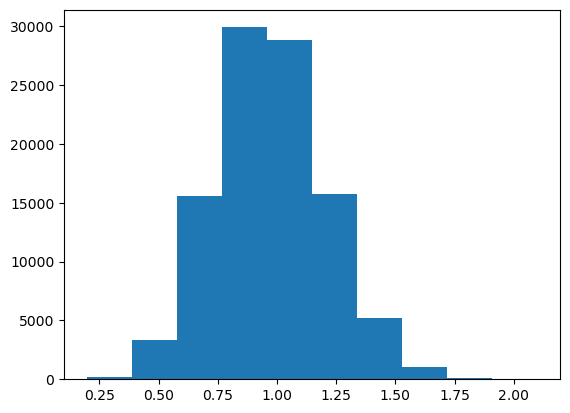

In [36]:

plt.hist(std_with_ddof_1_many)
plt.show()

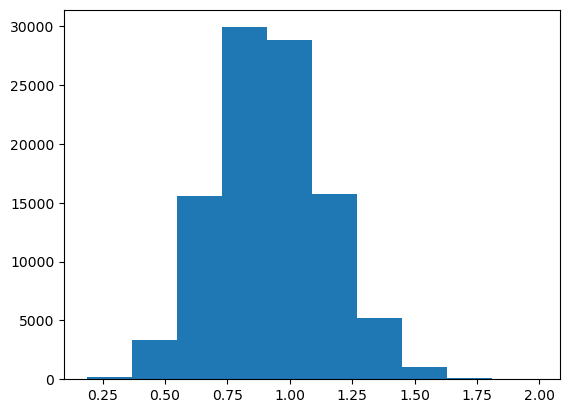

In [30]:
plt.hist(std_with_ddof_0_many)
plt.show()

For each sample compute the standard deviation with ddof = 1 (sample SD) and with ddof = 0 (population SD).

 https://numpy.org/doc/stable/reference/generated/numpy.std.html

 What's ddof? ddof delta degress of freedom. default ddof = 0. 
 ddof= 0 population standard deviation

 ddof= 1

 std =  sqrt of variance. 


In [ ]:
# From https://numpy.org/doc/stable/reference/generated/numpy.std.html
N = len(a)
d2 = abs(a - mean)**2  # abs is for complex `a`
var = d2.sum() / (N - ddof)  # note use of `ddof`
std = var**0.5

plot histograms of of both sets of values (standard deviation?) on the same axes with transparency

describe the differences

explain how you expect these differences to change if the sample size is increased.

## Problem 3: t-Tests

__Brief__: A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference _d_ = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean _d_ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
   
Plot this proportion against _d_, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA

__Brief__: Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
   
Write a short note on why ANOVA is preferred over running several t-tests.

End
***